##### This notebook is created for the sole purpose of performing EDA on the first sheet of the provided dataset, i.e., `Sales Order Sheet`.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
dataset = pd.read_excel("Sample Dataset (1).xlsx")
dataset

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006


In [41]:
dataset[(dataset.isna() | dataset.eq('')).any(axis=1)]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost
2520,SO - 0002622,In-Store,WARE-UHY1004,2018-10-27,2019-03-24,2019-04-01,2019-04-02,USD,7,19,213,29,8.0,NaN,5319.8,2766.296
2528,SO - 0002630,Wholesale,WARE-NMK1003,2019-02-04,2019-03-24,2019-04-01,2019-04-05,USD,28,16,159,5,3.0,NaN,2412.0,1061.280
4572,SO - 0004675,Online,WARE-NBV1002,2019-08-23,2019-11-27,2019-12-13,2019-12-20,USD,18,36,81,36,3.0,NaN,1011.7,607.020


In [42]:
x = float('nan')
print(type(x))

<class 'float'>


In [43]:
dataset = dataset.replace("", float('nan')).fillna(0.0)
# We are replacing the "" value with a float(nan), i.e., a float null value and then overriding that with 0.0
dataset[(dataset.isna() | dataset.eq('')).any(axis=1)]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost


In [44]:
dataset

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006


In [45]:
dataset[dataset["Sales Channel"]=="On line"]


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost
208,SO - 000309,On line,WARE-NMK1003,2017-12-31,2018-06-26,2018-07-19,2018-07-22,USD,15,21,157,1,2.0,0.05,1125.6,787.92


In [46]:
dataset[dataset["Sales Channel"]=="In Store"]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost
397,SO - 000499,In Store,WARE-PUJ1005,2018-04-10,2018-07-17,2018-08-12,2018-08-21,USD,7,28,307,4,3.0,0.15,201.0,80.4


In [47]:
dataset['Sales Channel'] = dataset['Sales Channel'].replace("On line", "Online")
dataset['Sales Channel'] = dataset['Sales Channel'].replace("In Store", "In-Store")
dataset[dataset["Sales Channel"]=="On line"]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost


In [48]:
dataset[dataset["Sales Channel"]=="In Store"]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost


The various correlations to be calculated are listed below:

1) Profits yielded
    - Mean and median profits aqcuired for various groups
    - Maximum quantity ordered
        - Which goods? (Done)
        - Which customer? (Done)
        - Which channel? (Done)
            - if offline, which store (In Progress)
    - Product-wise assessment of sales
        - Products with higher prices and higher sales
    - Channel-wise assessment of sales

2) Duration of Delivery (Wait-Time Analysis)
    - Check if Procured_Date < Order_Date < Shipping_Date < Delivery_Date (Done)
    - Find correlation between:
        - Order_Date VS Shipping_Date
        - Shipping_Date VS Delivery_Date
        - Order_Date VS Delivery_Date
    

In [49]:
import seaborn as sns

## Sales and Profits Visualization:

In [50]:
x = dataset['Unit Price'].mean()
y = dataset['Unit Price'].median()
x1 = dataset['Unit Cost'].mean()
y1 = dataset['Unit Cost'].median()
print(f"Unit Price Mean = {x}\nUnit Price Median = {y}")
print(f"Unit Cost Mean = {x1}\nUnit Cost Median = {y1}")

total_price_df = pd.DataFrame(dataset["Unit Price"]*dataset["Order Quantity"])
weighted_mean_total_price = total_price_df[0].sum()/dataset["Order Quantity"].sum()
print(f"\nWeighted_mean_total_Price = {weighted_mean_total_price}")

Unit Price Mean = 2288.4601309810214
Unit Price Median = 1855.9
Unit Cost Mean = 1434.5451936647955
Unit Cost Median = 1084.6965

Weighted_mean_total_Price = 3852.499999985001


In [51]:
total_price_df = pd.DataFrame(dataset["Unit Price"]*dataset["Order Quantity"])
weighted_mean_total_price = total_price_df[0].sum()/dataset["Order Quantity"].sum()
weighted_mean_total_price

np.float64(3852.499999985001)

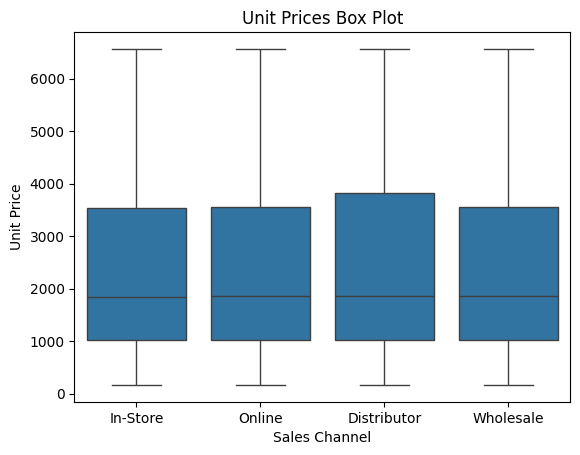

In [52]:
sns.boxplot(x='Sales Channel', y='Unit Price', data=dataset)
plt.title("Unit Prices Box Plot")
plt.show()

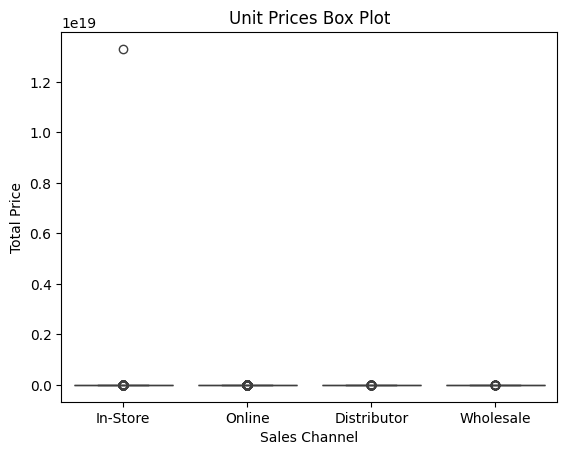

In [53]:
dataset_version_1 = dataset
dataset_version_1["Total Price"] = dataset_version_1["Order Quantity"]*dataset_version_1["Unit Price"]

sns.boxplot(x='Sales Channel', y='Total Price', data=dataset_version_1)
plt.title("Unit Prices Box Plot")
plt.show()

In [54]:
dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].max()]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
5790,SO - 0005894,In-Store,WARE-PUJ1005,2019-12-01,2020-04-18,2020-05-01,2020-05-04,USD,7,30,280,27,3.454354e+15,0.1,3852.5,2234.45,1.330790e+19


In [55]:
list_of_max_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].max()].index)
for i in list_of_max_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


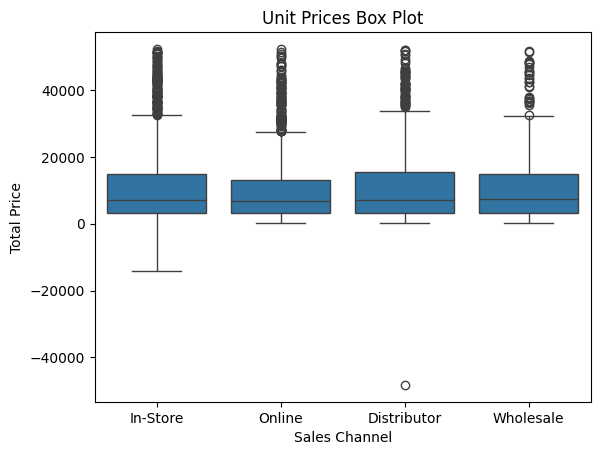

In [56]:
sns.boxplot(x='Sales Channel', y='Total Price', data=dataset_version_1)
plt.title("Unit Prices Box Plot")
plt.show()

In [57]:
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
145,SO - 000246,Distributor,WARE-XYS1001,2018-04-10,2018-06-17,2018-07-10,2018-07-17,USD,24,42,36,18,-45.0,0.15,1072.0,643.2,-48240.0


In [58]:
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


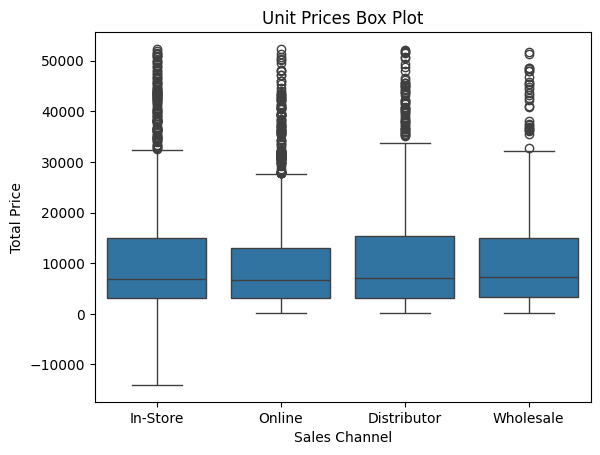

In [59]:
sns.boxplot(x='Sales Channel', y='Total Price', data=dataset_version_1)
plt.title("Unit Prices Box Plot")
plt.show()

The circles visible in the plot generated above happen to be Outliers with respect to the BOX PLOT criteria. The BOX PLOT criteria is as follows:

Let `x` be a value being represented in the box plot:
$$x > Q3 + ( 1.5 * IQR )$$
$$x < Q1 - ( 1.5 * IQR )$$
where IQR stands for Inter-Quartile Range and is calculated as follows:
$$IQR = Q3 - Q1$$

Since the circle points are gradual, and not visible to be peaking abruptly, it can be inferred that these values are required and retained on purpose. These shall be useful in the generation of insights in the further stages.

In [60]:
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()]
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


In [61]:
dataset_version_1[dataset_version_1["Order Quantity"]==dataset_version_1["Order Quantity"].min()]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
3939,SO - 0004042,Distributor,WARE-NMK1003,2019-05-15,2019-09-09,2019-09-27,2019-09-30,USD,23,39,105,9,0.4,0.05,1145.7,801.99,458.28


In [62]:
dataset_version_2 = dataset_version_1[(dataset_version_1["Customer Code"]==39) & (dataset_version_1["Product Code"]==9)]
list_of_min_Outlier_Indexes = list(dataset_version_2[dataset_version_2["Order Quantity"]==dataset_version_2["Order Quantity"].min()].index)
dataset_version_2[dataset_version_2["Order Quantity"]==dataset_version_2["Order Quantity"].min()]
for i in list_of_min_Outlier_Indexes:
    dataset_version_2.drop(i, inplace=True)
temp_order_Quantity = round(dataset_version_2["Order Quantity"].mean())
temp_order_Quantity

C:\Users\zenda\AppData\Local\Temp\ipykernel_2096\2444603024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_version_2.drop(i, inplace=True)


4

In [63]:
dataset_version_1.loc[dataset_version_1["Order Quantity"] == dataset_version_1["Order Quantity"].min(),"Order Quantity"] = 4

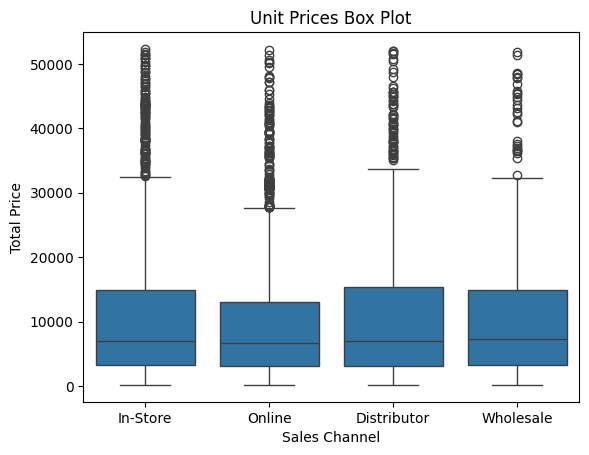

In [64]:
sns.boxplot(x='Sales Channel', y='Total Price', data=dataset_version_1)
plt.title("Unit Prices Box Plot")
plt.show()

In [65]:
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


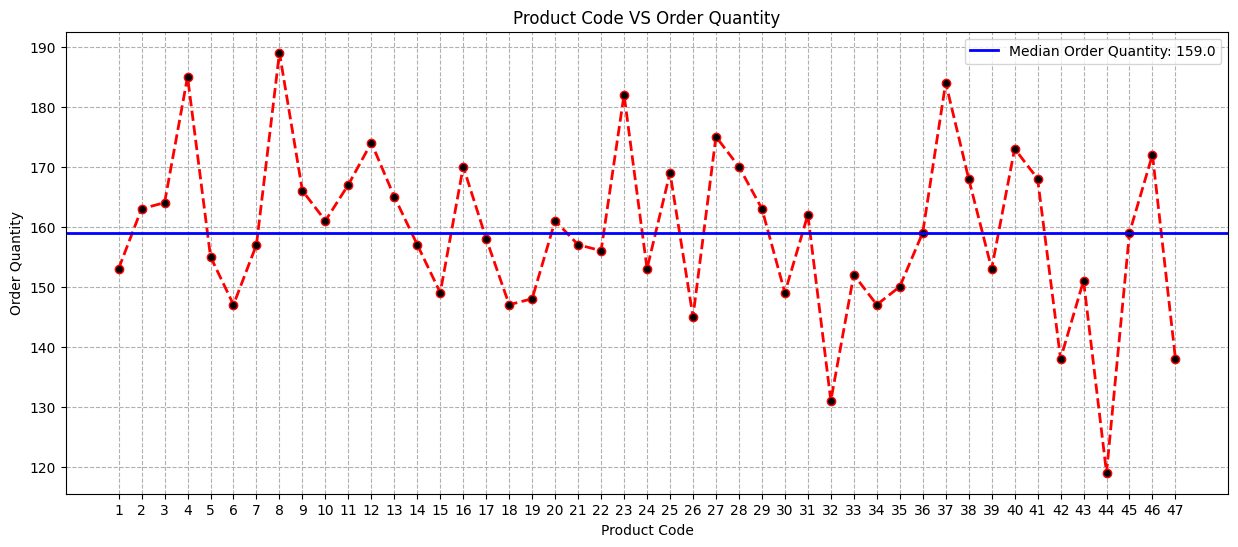

In [66]:
plt.figure(figsize=(15, 6))
plt1 = dataset_version_1.groupby("Product Code")[["Order Quantity"]].count()
plt.plot(plt1.index,plt1["Order Quantity"], color="red", linewidth=2, linestyle="--", marker='o', mfc="black")
plt.xticks(np.arange(1,48,1))
plt.xlabel("Product Code")
plt.ylabel("Order Quantity")
plt.grid(linestyle='--')
plt.title("Product Code VS Order Quantity")
median_order_quantity = plt1["Order Quantity"].median()
plt.axhline(y=median_order_quantity, color='blue', linestyle='-', linewidth=2, label=f'Median Order Quantity: {median_order_quantity}')
plt.legend()
plt.show()

In [67]:
dataset_version_1 = pd.DataFrame(dataset)

# Group by Product Code and sum the Order Quantity
plt1 = dataset_version_1.groupby("Product Code")[["Order Quantity"]].sum()

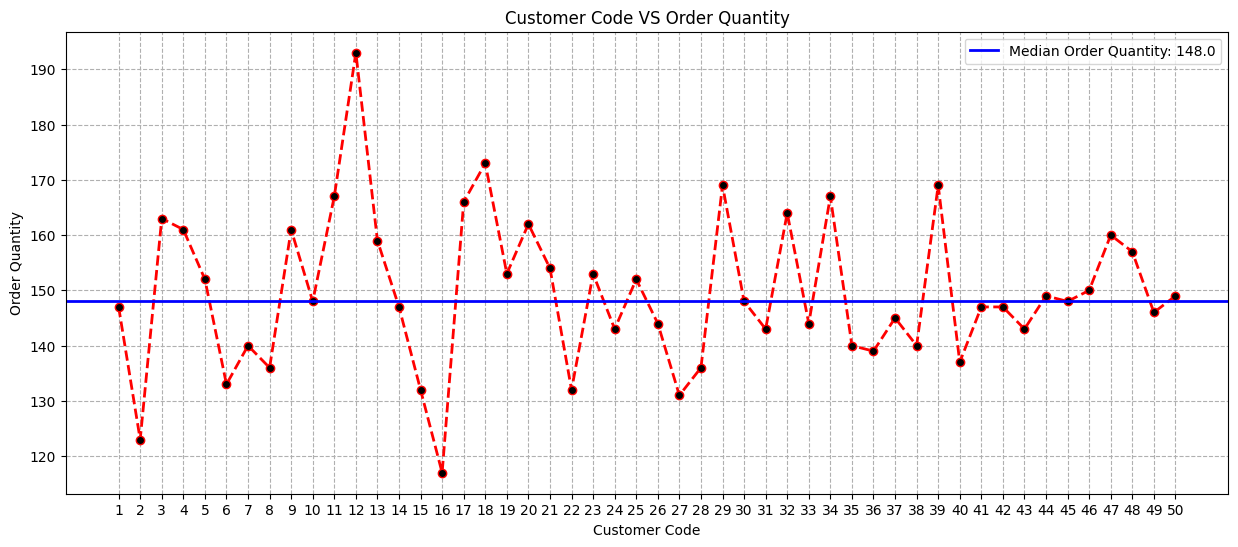

In [68]:
plt.figure(figsize=(15, 6))
plt1 = dataset_version_1.groupby("Customer Code")[["Order Quantity"]].count()
plt.plot(plt1.index,plt1["Order Quantity"], color="red", linewidth=2, linestyle="--", marker='o', mfc="black")
plt.xticks(np.arange(1,51,1))
plt.xlabel("Customer Code")
plt.ylabel("Order Quantity")
median_order_quantity = plt1["Order Quantity"].median()
plt.axhline(y=median_order_quantity, color='blue', linestyle='-', linewidth=2, label=f'Median Order Quantity: {median_order_quantity}')
plt.grid(linestyle='--')
plt.title("Customer Code VS Order Quantity")
plt.legend()
plt.show()

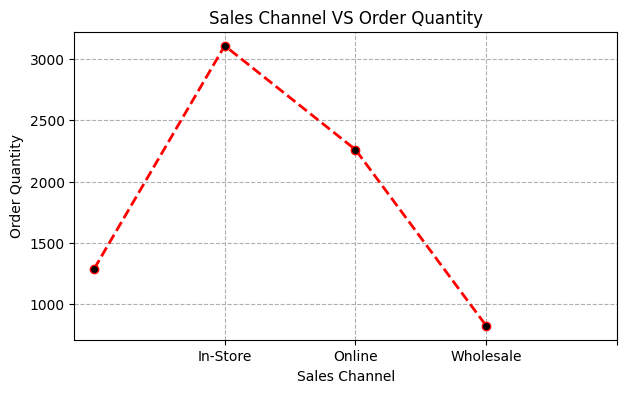

In [69]:
plt.figure(figsize=(7, 4))
plt1 = dataset_version_1.groupby("Sales Channel")[["Order Quantity"]].count()
plt.plot(plt1.index,plt1["Order Quantity"], color="red", linewidth=2, linestyle="--", marker='o', mfc="black")
plt.xticks(np.arange(1,5,1))
plt.xlabel("Sales Channel")
plt.ylabel("Order Quantity")
plt.grid(linestyle='--')
plt.title("Sales Channel VS Order Quantity")
plt.show()

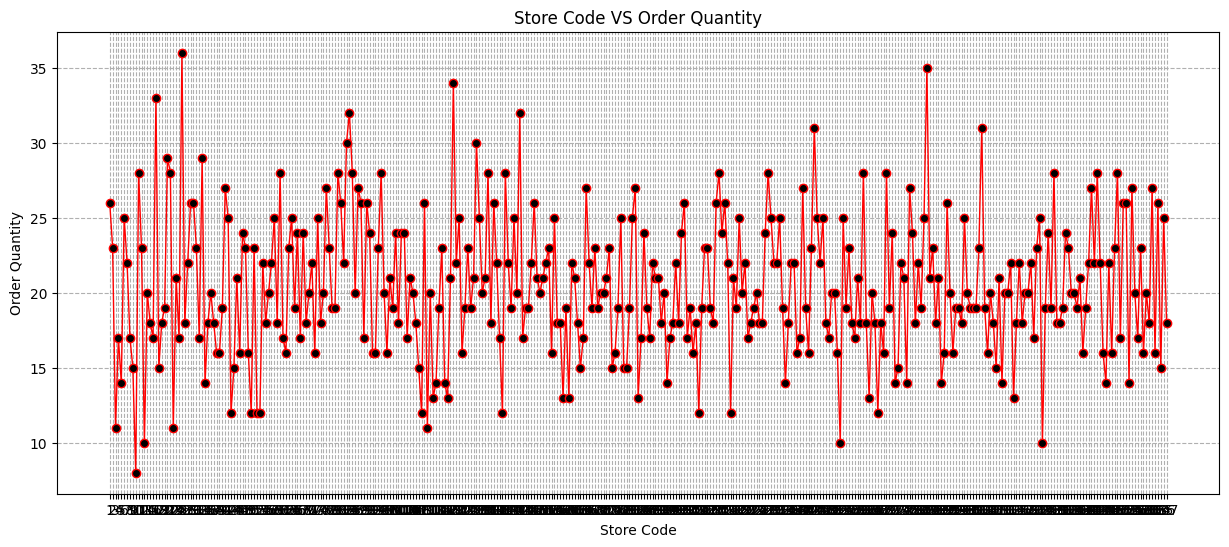

In [70]:
# Change the code to a better illustration via horizontal bar graphs if possible.
plt.figure(figsize=(15, 6))
plt1 = dataset_version_1.groupby("Store Code")[["Order Quantity"]].count()
plt.plot(plt1.index,plt1["Order Quantity"], color="red", linewidth=1, linestyle="-", marker='o', mfc="black")
# plt.hist(x = dataset_version_1["Order Quantity"], bins = 367)
plt.xticks(np.arange(1,368,1))
plt.xlabel("Store Code")
plt.ylabel("Order Quantity")
plt.grid(linestyle='--')
plt.title("Store Code VS Order Quantity")
plt.show()

### Delivery Analytics:

Checking if all the Dates provided in the dataset are validated or not:

In [71]:
check1 = dataset_version_1[dataset_version_1["ProcuredDate"]<dataset_version_1["OrderDate"]].shape
check2 = dataset_version_1[dataset_version_1["OrderDate"]<dataset_version_1["ShipDate"]].shape
check3 = dataset_version_1[dataset_version_1["ShipDate"]<dataset_version_1["DeliveryDate"]].shape
if check1==check2 and check2==check3:
    print("There is no Date Discrepancy.")
elif check1!=check2:
    print("Discrepancy found in Check1 and Check2")
elif check3!=check2:
    print("Discrepancy found in Check3 and Check2")
elif check1!=check3:
    print("Discrepancy found in Check1 and Check3")
# dataset_version_1["ShipDate"]<dataset_version_1["DeliveryrDate"]

There is no Date Discrepancy.


##### Correlation Analysis of the Dates:

OrderDate VS ShipDate

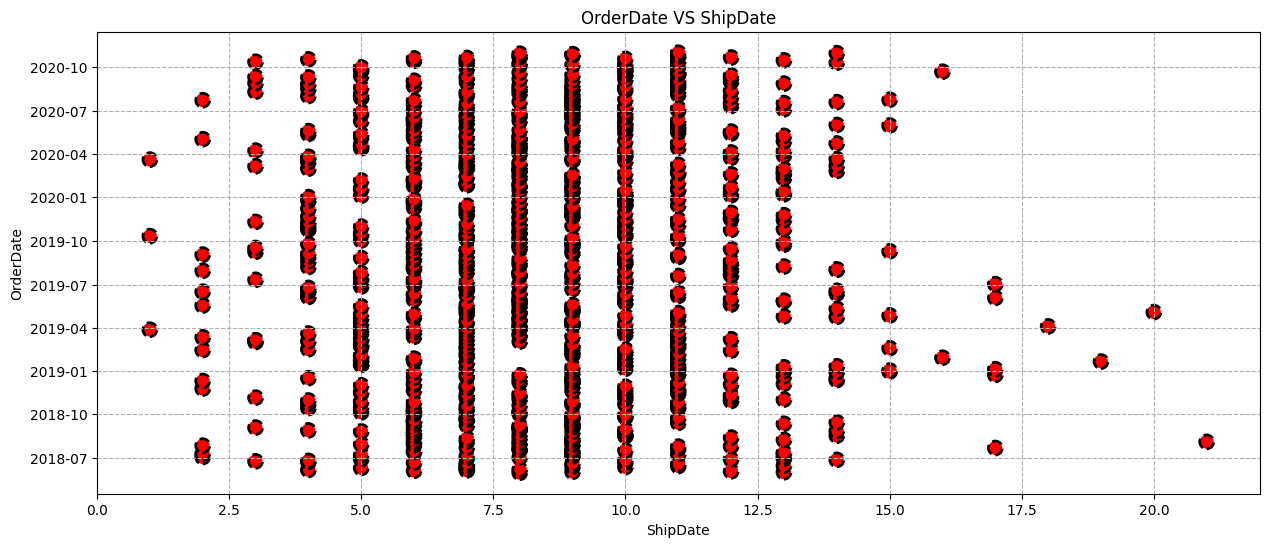

In [89]:
plt.figure(figsize=(15, 6))
plt1 = dataset_version_1.groupby("OrderDate")[["ShipDate"]].count()
plt.scatter(plt1["ShipDate"], plt1.index, color="red", linewidth=2, linestyle="--", edgecolors="black", s=100)
# plt.xticks(np.arange(1,5,1))
plt.ylabel("OrderDate")
plt.xlabel("ShipDate")
plt.grid(linestyle='--')
plt.title("OrderDate VS ShipDate")
plt.show()

C:\Users\zenda\AppData\Local\Temp\ipykernel_2096\3343725456.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


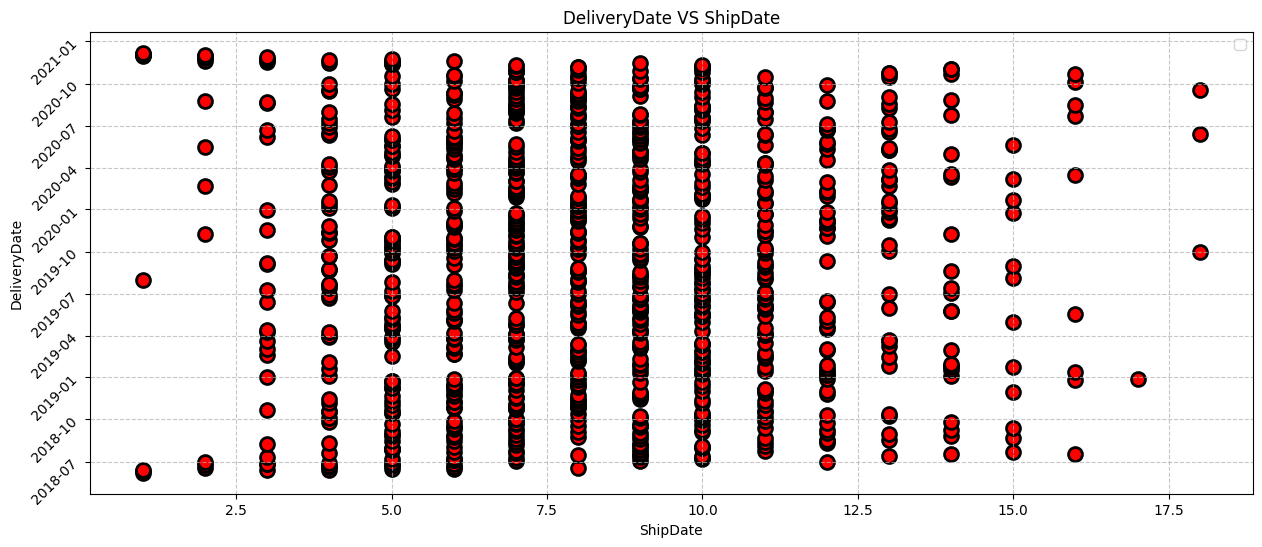

In [86]:
plt.figure(figsize=(15, 6))
plt1 = dataset_version_1.groupby("DeliveryDate")[["ShipDate"]].count()
plt.scatter(plt1["ShipDate"], plt1.index, color="red", linewidth=2, edgecolors="black", s=100)
# plt.xticks(np.arange(1,5,1))
plt.ylabel("DeliveryDate")
plt.xlabel("ShipDate")
plt.yticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.title("DeliveryDate VS ShipDate")
plt.show()

C:\Users\zenda\AppData\Local\Temp\ipykernel_2096\2871359852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


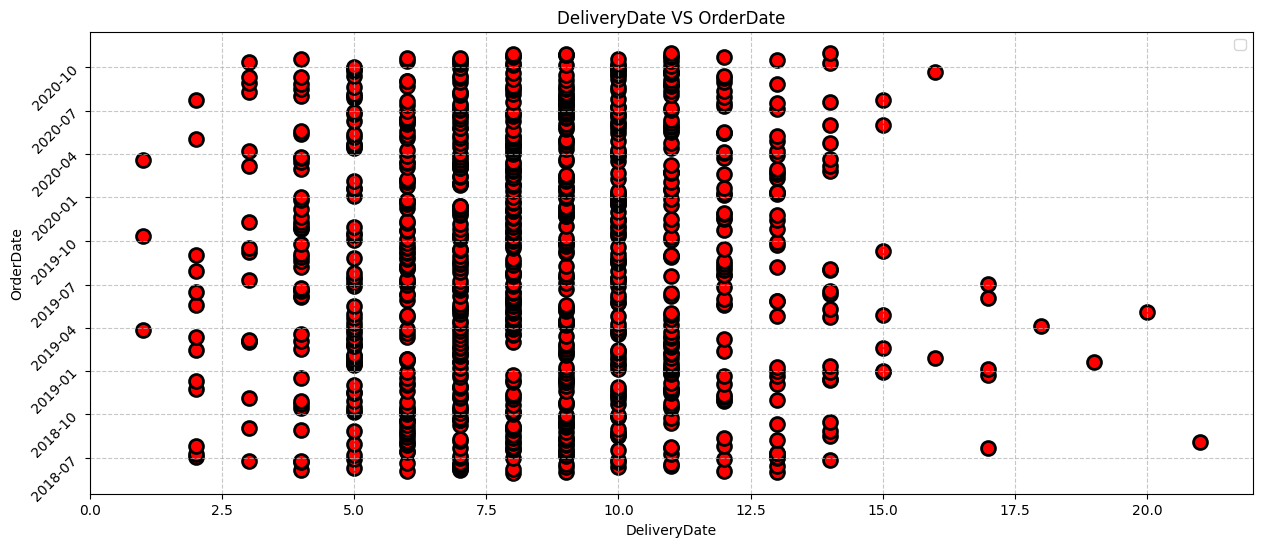

In [92]:
plt.figure(figsize=(15, 6))
plt1 = dataset_version_1.groupby("OrderDate")[["DeliveryDate"]].count()
plt.scatter(plt1["DeliveryDate"], plt1.index, color="red", linewidth=2, edgecolors="black", s=100)
# plt.xticks(np.arange(1,5,1))
plt.ylabel("OrderDate")
plt.xlabel("DeliveryDate")
plt.yticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.title("DeliveryDate VS OrderDate")
plt.show()

#### The Most sold product in sales channel


## Online

In [93]:
online_sales = dataset[dataset['Sales Channel'] == 'Online']
online_sales_summary = online_sales.groupby('Product Code')['Order Quantity'].sum()
most_selling_product = online_sales_summary.idxmax()
max_order_quantity = online_sales_summary.max()

print(f"The product selling the most in the Online sales channel is: {most_selling_product} with {max_order_quantity} units sold.")

The product selling the most in the 'Online' sales channel is: 12 with 292.0 units sold.


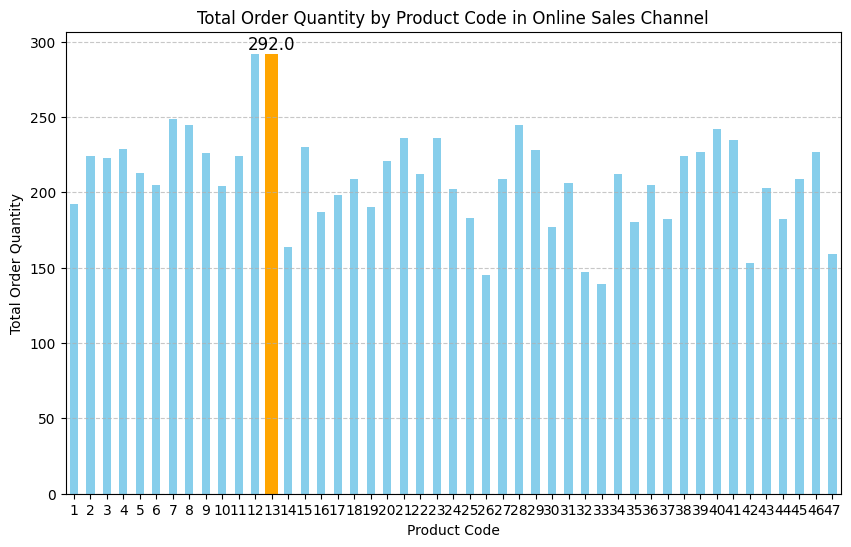

In [94]:
plt.figure(figsize=(10, 6))
online_sales_summary.plot(kind='bar', color='skyblue')
plt.title('Total Order Quantity by Product Code in Online Sales Channel')
plt.xlabel('Product Code')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the most selling product
plt.bar(most_selling_product, max_order_quantity, color='orange')

# Annotate the most selling product
plt.text(most_selling_product, max_order_quantity, f'{max_order_quantity}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

## In-Store

In [107]:
inStore_sales = dataset[dataset['Sales Channel'] == 'In-Store']
inStore_sales_summary = inStore_sales.groupby('Product Code')['Order Quantity'].sum()
most_selling_product = inStore_sales_summary.idxmax()
max_order_quantity = inStore_sales_summary.max()

print(f"The product selling the most in the In-Store sales channel is: {most_selling_product} with {max_order_quantity} units sold.")

The product selling the most in the In-Store sales channel is: 23 with 399.0 units sold.


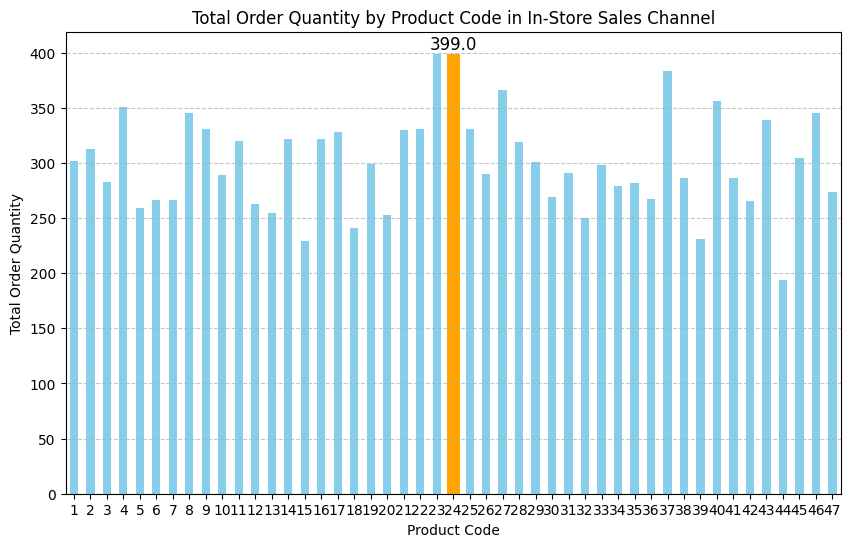

In [108]:
plt.figure(figsize=(10, 6))
inStore_sales_summary.plot(kind='bar', color='skyblue')
plt.title('Total Order Quantity by Product Code in In-Store Sales Channel')
plt.xlabel('Product Code')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the most selling product
plt.bar(most_selling_product, max_order_quantity, color='orange')

# Annotate the most selling product
plt.text(most_selling_product, max_order_quantity, f'{max_order_quantity}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

## Distributer


In [99]:
distributor_sales = dataset[dataset['Sales Channel'] == 'Distributor']
distributor_sales_summary = distributor_sales.groupby('Product Code')['Order Quantity'].sum()
most_selling_product = distributor_sales_summary.idxmax()
max_order_quantity = distributor_sales_summary.max()

print(f"The product selling the most in the Distributor sales channel is: {most_selling_product} with {max_order_quantity} units sold.")

The product selling the most in the Distributor sales channel is: 20 with 201.0 units sold.


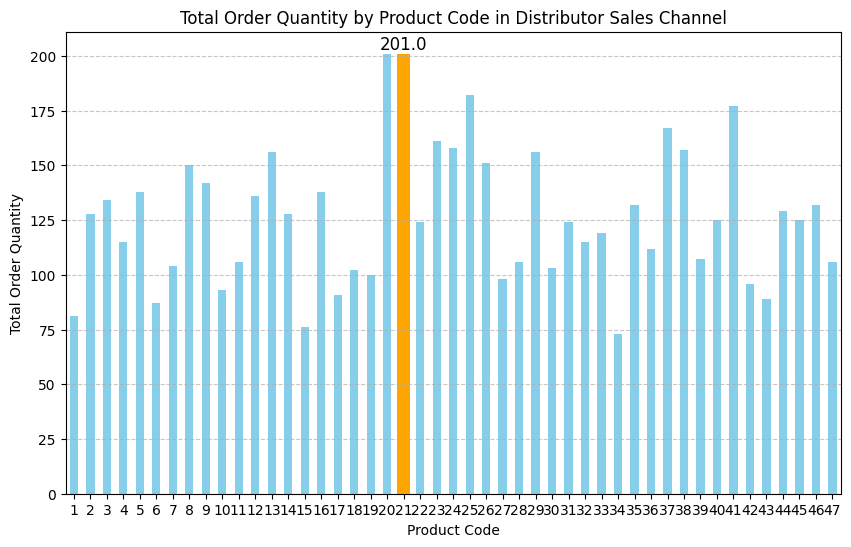

In [100]:
plt.figure(figsize=(10, 6))
distributor_sales_summary.plot(kind='bar', color='skyblue')
plt.title('Total Order Quantity by Product Code in Distributor Sales Channel')
plt.xlabel('Product Code')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the most selling product
plt.bar(most_selling_product, max_order_quantity, color='orange')

# Annotate the most selling product
plt.text(most_selling_product, max_order_quantity, f'{max_order_quantity}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

## Wholesale

In [101]:
wholesale_sales = dataset[dataset['Sales Channel'] == 'Wholesale']
wholesale_sales_summary = wholesale_sales.groupby('Product Code')['Order Quantity'].sum()
most_selling_product = wholesale_sales_summary.idxmax()
max_order_quantity = wholesale_sales_summary.max()

print(f"The product selling the most in the Wholesale sales channel is: {most_selling_product} with {max_order_quantity} units sold.")

The product selling the most in the Wholesale sales channel is: 16 with 126.0 units sold.


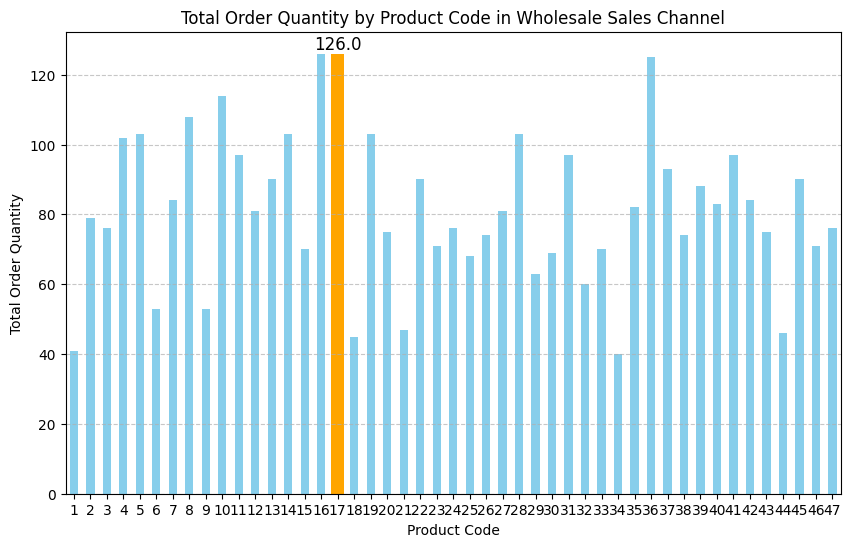

In [103]:
plt.figure(figsize=(10, 6))
wholesale_sales_summary.plot(kind='bar', color='skyblue')
plt.title('Total Order Quantity by Product Code in Wholesale Sales Channel')
plt.xlabel('Product Code')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the most selling product
plt.bar(most_selling_product, max_order_quantity, color='orange')

# Annotate the most selling product
plt.text(most_selling_product, max_order_quantity, f'{max_order_quantity}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()